In [8]:
import math
import array as arr
from fractions import gcd
import matplotlib.pyplot as plt
from sympy.ntheory.factor_ import totient 
from sympy import symbols, expand, simplify, mod_inverse

In [9]:
def is_perfect_power(n):
    # python's pow function is O(log(n)) with respect to either input, so this works in place of a manual binary search
    for b in range(2, int(math.ceil(math.log(n)))):
        a = math.pow(n, 1/b)
        #print(f"Testing value b: {b}. This yields a: {a:.15f}.")
        if int(a) ** b == n:
            return [n, a, b, True]

    return [n, 0, 0, False]

In [10]:
def find_r(n):
   # Find smallest r such that the order of n mod r > log2(n)^2.

   maxK = math.log2(n)**2   
   maxR = math.log2(n)**5   
   nexR = True              
   r = 1                   
   while nexR == True:
       r +=1
       nexR = False
       k = 0
       while k <= maxK and nexR == False:
           k = k+1
           if fastMod(n,k,r) == 0 or fastMod(n,k,r) == 1:
               nexR = True
   return(r)

In [11]:
# this catches any n such that r is found to be gcd(n, r) != 1.
# otherwise the order of n mod r doesn't exist but n must be composite in this case 
# returns true of any integers between 1 and r share a divisor with n besides 1 itself

def check_gcd(n, r):
    for a in range(1, r + 1):
        if math.gcd(a, n) > 1:
            # edge case that should never show up in the intended use case, but if r == n then n could still be prime
            if a == r and r == n:
                return False
            # n is definitely composite
            return True
    # n could still be prime
    return False

In [12]:
def fastMod(base,power,n):
# Fast modular exponentiation
    r=1
    while power > 0:
        if power % 2 == 1:
            r = r * base % n
        base = base**2 % n
        power = power // 2
    return(r)



In [13]:
def fastPoly(base, power,r):
# Fast polynomial exponentiation mod x^r - 1
    x = arr.array('d',[],)
    a = base[0]

    for i in range(len(base)):
        x.append(0)
    x[(0)] = 1 
    n = power
    
    while power > 0:
        if power % 2 == 1: 
            x = multi(x,base,n,r)
        base = multi(base,base,n,r)
        power = power // 2

    x[(0)] = x[(0)] - a
    x[(n % r )] = x[(n % r )] - 1        
    return(x)

In [14]:
def multi(a,b,n,r):
# Multiply two polynomials together quickly
    x = arr.array('d',[])
    for i in range(len(a)+len(b)-1):
        x.append(0)
    for i in range(len(a)):
        for j in range(len(b)):
            x[(i+j) % r ] += a[(i)] * b[(j)] 
            x[(i+j) % r] = x[(i+j) % r] % n 
    for i in range(r,len(x)):
            x=x[:-1]
    return(x)

In [30]:
def aks(n):
# The main algorithm
    if is_perfect_power(n) == True:                     #step 1
        return('Composite')
    r = find_r(n)      
    l = math.floor(math.sqrt(totient(r)*math.log(n)))
    
                                    #step 2

    for a in range(2,min(r,n)):                     #step 3
        if math.gcd(a,n) > 1:                       
            return('Composite')

    if n <= r:                                      #step 4
        return('Prime')

    x = arr.array('l',[],)                         #step 5
    for a in range(1,l):      
        x = fastPoly(arr.array('l',[a,1]),n,r)
        if  any(x):
            return('Composite')
    return('Prime')                                 #step 6

Checkpoint at 10
Checkpoint at 10010
Checkpoint at 20010
22013 ran too long
Checkpoint at 30010
30013 ran too long
Checkpoint at 40010
43013 ran too long
Checkpoint at 50010
Checkpoint at 60010
Checkpoint at 70010
75017 ran too long
Checkpoint at 80010
84017 ran too long
87011 ran too long
88019 ran too long
Checkpoint at 90010
98017 ran too long
99013 ran too long
Total elapsed time: 126.10455799102783 seconds


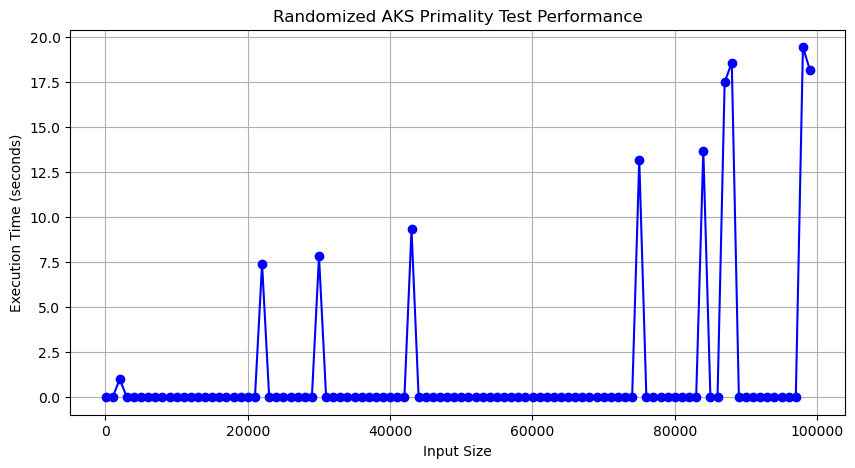

In [77]:
import time
import random
# Testing range

# Store results
times = []
inputs = []
begin = time.time()
for i in range(10, 10**5, 1000):
    if i % 10000 == 10:
        print(f"Checkpoint at {i}")
    rand = random.randint(1, 10)
    start_time = time.time()
    aks(i + rand)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    if elapsed_time > 1:
        print(f"{i + rand} ran too long")
    times.append(elapsed_time)
    inputs.append(i)
end = time.time()
print(f"Total elapsed time: {end - begin} seconds")
plt.figure(figsize=(10, 5))
plt.plot(inputs, times, marker='o', linestyle='-', color='b')
plt.title('Randomized AKS Primality Test Performance')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

In [85]:
# Store results
from sympy import isprime
times_prime_deterministic = []
inputs_prime_deterministic = []
begin = time.time()
for i in range(10, 10**3, 1):
    if i % 10000 == 0:
        print(f"Checkpoint at {i}")
    if isprime(i):
        start_time = time.time()
        aks(i)
        end_time = time.time()

        elapsed_time = end_time - start_time
        times_prime_deterministic.append(elapsed_time)
        inputs_prime_deterministic.append(i)
end = time.time()




Total elapsed time: 33.143385887145996 seconds


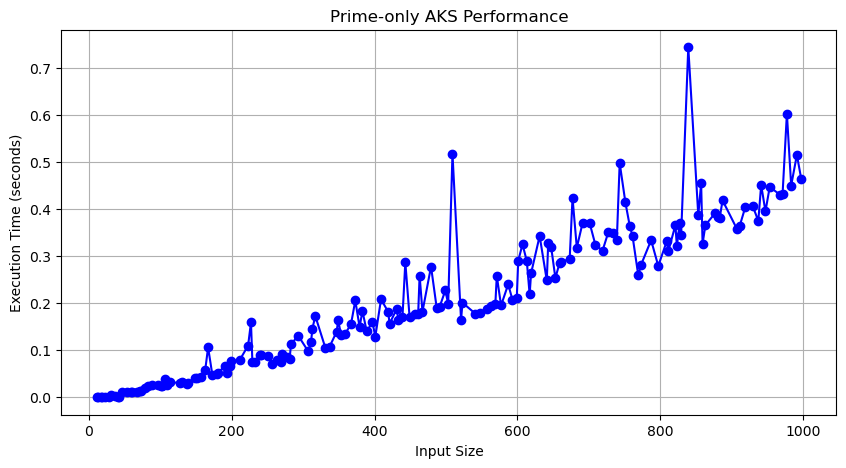

In [86]:
print(f"Total elapsed time: {end - begin} seconds")
plt.figure(figsize=(10, 5))
plt.plot(inputs_prime_deterministic, times_prime_deterministic, marker='o', linestyle='-', color='b')
plt.title('Prime-only AKS Performance')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

Checking 1453
Checking 2287
Checking 6689
Checking 9049
Checking 9623
Checking 13309
Checking 13499
Checking 18059
Checking 19031
Checking 20693
Checking 21017
Checking 21611
Checking 25261
Checking 31063
Checking 33029
Checking 35051
Checking 44269
Checking 45053
Checking 45641
Checking 52259
Checking 57467
Checking 59659
Checking 59879
Checking 64217
Checking 65099
Checking 66617
Checking 69019
Checking 72227
Checking 75011
Checking 78893
Checking 81667
Checking 87697
Checking 88819
Checking 99257
Total elapsed time: 327.2157988548279 seconds


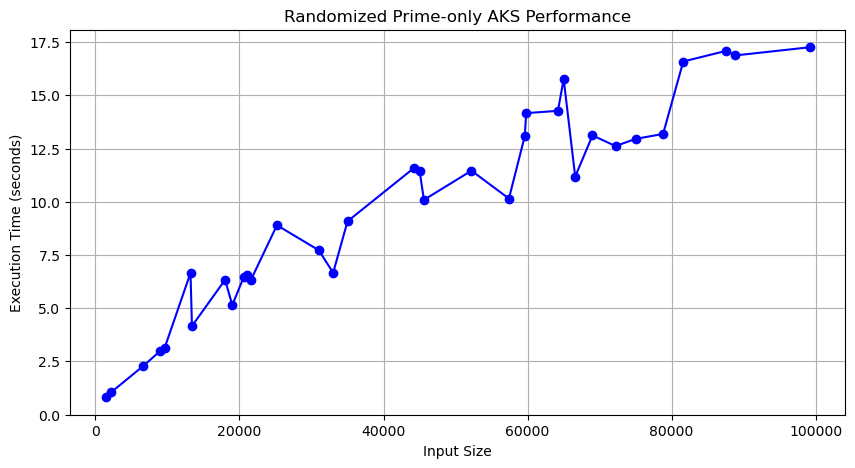

In [112]:
from sympy import isprime
times_prime_randomized = []
inputs_prime_randomized = []
begin = time.time()
for i in range(10, 10**5, 200):
    rand = random.randint(1, 100)
    if i % 10000 == 0:
        print(f"Checkpoint at {i}")
    if isprime(i + rand):
        print(f"Checking {i + rand}")
        start_time = time.time()
        aks(i + rand)
        end_time = time.time()

        elapsed_time = end_time - start_time
        times_prime_randomized.append(elapsed_time)
        inputs_prime_randomized.append(i)
end = time.time()
print(f"Total elapsed time: {end - begin} seconds")
plt.figure(figsize=(10, 5))
plt.plot(inputs_prime_randomized, times_prime_randomized, marker='o', linestyle='-', color='b')
plt.title('Randomized Prime-only AKS Performance')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

Total elapsed time: 0.591555118560791 seconds


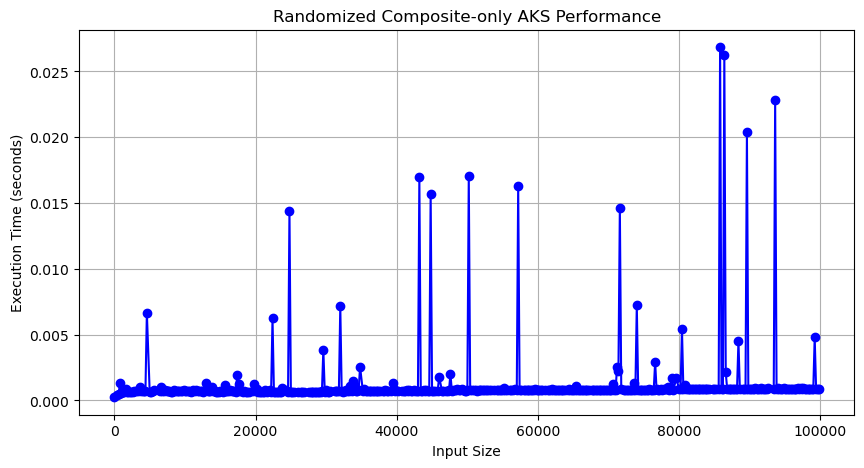

In [115]:
from sympy import isprime
times_composite_randomized = []
inputs_composite_randomized = []
begin = time.time()
for i in range(10, 10**5, 200):
    rand = random.randint(1, 100)
    if not isprime(i + rand):
        start_time = time.time()
        aks(i + rand)
        end_time = time.time()

        elapsed_time = end_time - start_time
        times_composite_randomized.append(elapsed_time)
        inputs_composite_randomized.append(i)
end = time.time()
print(f"Total elapsed time: {end - begin} seconds")
plt.figure(figsize=(10, 5))
plt.plot(inputs_composite_randomized, times_composite_randomized, marker='o', linestyle='-', color='b')
plt.title('Randomized Composite-only AKS Performance')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()